Week 9 Summary

# Clusters of eQTLs linked to regulatory genes
In our visualised heatmap, we can observe distinct spots of heat on the left. These represent a set of variants (snps) that are closely associated with a subset of regulatory genes.

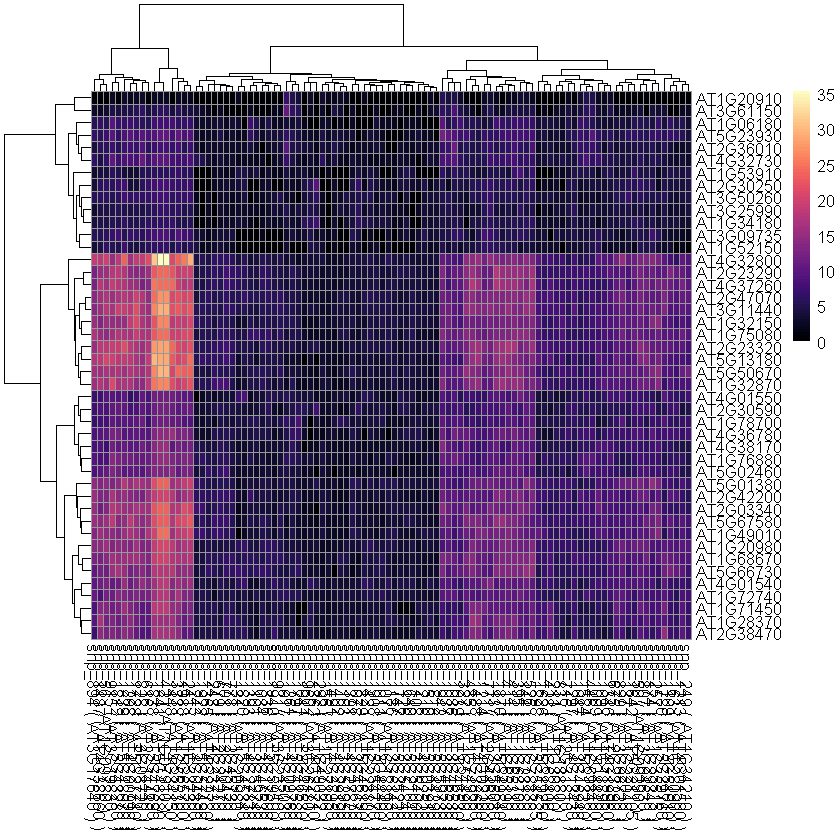

In [1]:
## Visualise the heatmap
    library(pheatmap)
    load('../results/output_cluster.Rda')

    grn_effect_pheatmap

The package `pheatmap` sorts variables based on hierarchical clustering, specifically `hclust()`. By splitting the dendrogram based on height, we can obtain clusters of snps.

[1] "5 variant clusters"


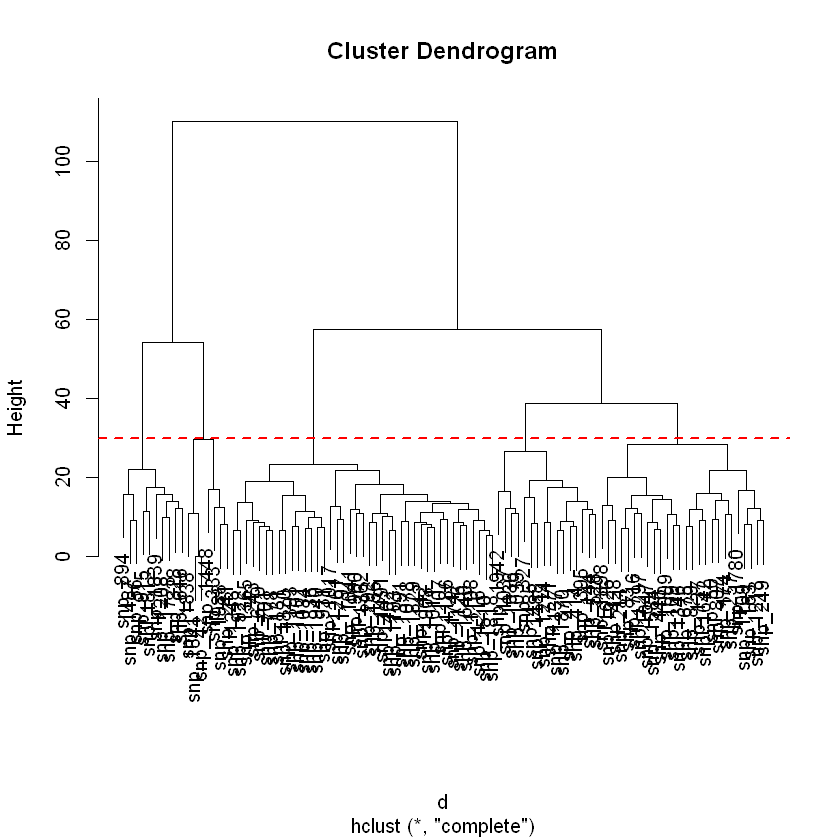

In [2]:
## Extract clusters based on height of heirarchy
    clusters <- sort(cutree(grn_effect_pheatmap$tree_col, h=30));
    plot(grn_effect_pheatmap$tree_col)
    abline(h=30, col="red", lty=2, lwd=2) # height = 30

print(paste(max(clusters),"variant clusters")) # Number of clusters

It is then useful to store the clusters of variants as lists of snps and its geneid.

In [3]:
## Write snp lists to .csv files
    for (x in 1:max(clusters)){
        snpid <- names(which(clusters==x)) # Creates a vector list of snps in cluster x
        geneid <- snp_to_gene[snpid]
        filename <- paste0("../results/cluster_",x,".csv")
        write.csv(cbind(snpid,geneid),file = filename, row.names = F) 
    }
    
head('../results/cluster_4.csv')

ERROR: Error in eval(expr, envir, enclos): object 'snp_to_gene' not found


Recall that we were particularly interested in snps shown in the left cluster of the heatmap. Note: `connected_snps` is the snpids ordered according to the heatmap column order from left to right.

In [ ]:
## Obtain the cluster of interest
    first_snp <- connected_snps[1]
    cluster_of_interest <- clusters[first_snp]
    snplist <- read.csv(file=paste0('../results/cluster_',cluster_of_interest,'.csv'))

print(paste(first_snp,'is in cluster',cluster_of_interest))
head(snplist)

We can then look up gene descriptions given the list of geneids on arabidopsis.org via [Gene Description Search and Download](https://www.arabidopsis.org/tools/bulk/genes/). In the case of cluster 4, here are the resulting descriptions.

Currently, it is beyond my ability to automate the interaction between R and the gene description tool. I have to manually copy paste the geneids from cluster_*.csv into the website. Furthermore, even with the text (see `cluster_4_descriptions.txt`) the format is not suitable for read.table. It is not elegant, but we simply have to save the gene description table as a pdf (see `cluster_4_descriptions.pdf`).

### Tasks
* Make a biological interpretation of the association of this variant cluster on bolting. Specifically, given the function of the genes which the cluster of snps are located in, why are they highly associated with regulatory genes involved with bolting.
* For all the `connected_snps`, graphically map their locus in the genome, and color code for different clusters. Observe whether snps in the same cluster are located closer.